In [1]:
# import all the necessary tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.metrics import classification_report, r2_score, accuracy_score , f1_score, recall_score , precision_score, mean_absolute_error, mean_squared_error, confusion_matrix,mean_absolute_percentage_error

In [4]:
# import data and analyse
df = pd.read_csv("mhealth_raw_data.csv.zip")
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,1215745.0,1.494200,3.826485,-22.1460,0.14131,1.308900,2.575800,20.0540
aly,1215745.0,-9.692878,4.171303,-19.6190,-10.20100,-9.670300,-9.042200,21.1610
alz,1215745.0,-0.954806,5.461803,-19.3730,-2.64940,-0.016456,1.301300,25.0150
glx,1215745.0,-0.001599,0.491217,-2.1466,-0.43599,-0.014842,0.448980,60.4840
gly,1215745.0,-0.616632,0.354641,-7.7899,-0.81801,-0.707320,-0.540340,2.0113
glz,1215745.0,-0.158781,0.546798,-2.6267,-0.59332,-0.190570,0.322200,2.7701
arx,1215745.0,-3.713413,4.763586,-22.3610,-6.07600,-2.977600,-1.193700,19.8640
ary,1215745.0,-5.805526,5.757639,-18.9720,-9.40420,-7.461500,-2.533900,22.1910
arz,1215745.0,2.393880,3.876503,-18.2390,0.12965,1.928100,4.914700,25.7410
grx,1215745.0,-0.276106,0.527689,-8.3392,-0.70588,-0.354900,0.096078,3.3196


In [7]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: ylabel='count'>

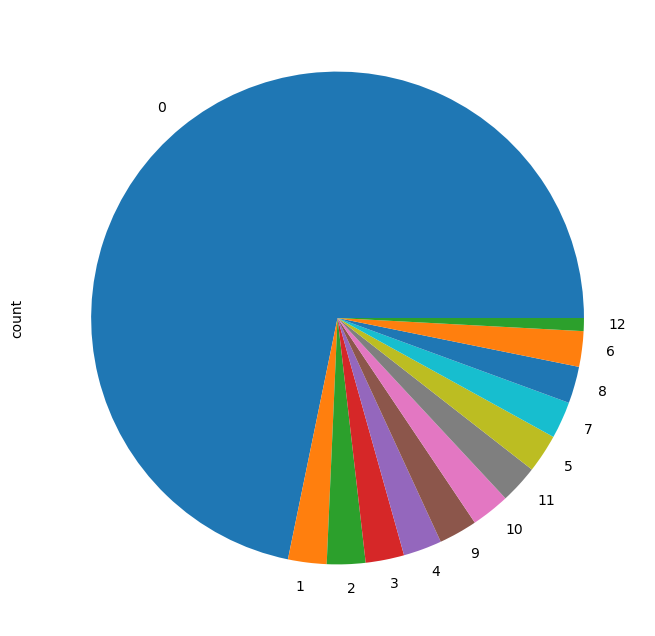

In [9]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.pie()

In [10]:
data_activity_0 = df[df["Activity"]==0]
data_activity_other = df[df["Activity"] !=0]

In [11]:
data_activity_0 = data_activity_0.sample(n = 4000)
df = pd.concat([data_activity_0,data_activity_other])

<Axes: ylabel='count'>

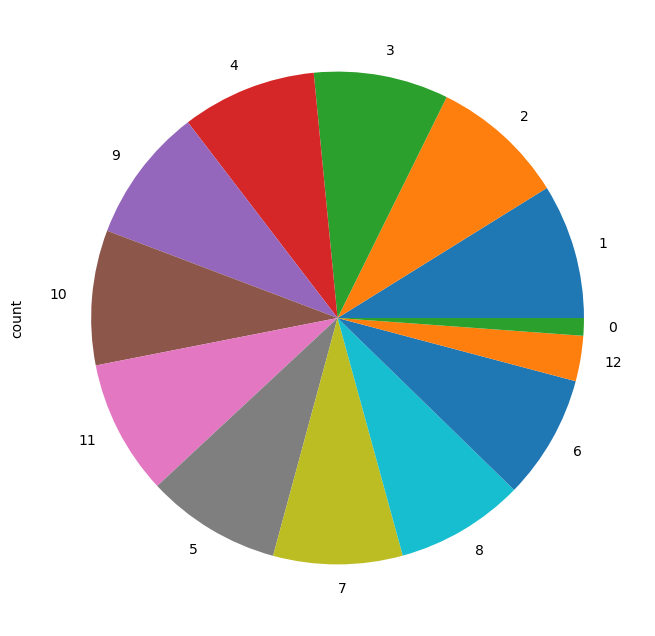

In [12]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.pie()

In [13]:
# EXPLORATORY DATA ANALYSIS
activity_label = {
    0: "None",
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)"
}

               Standing still (1 min) - a               


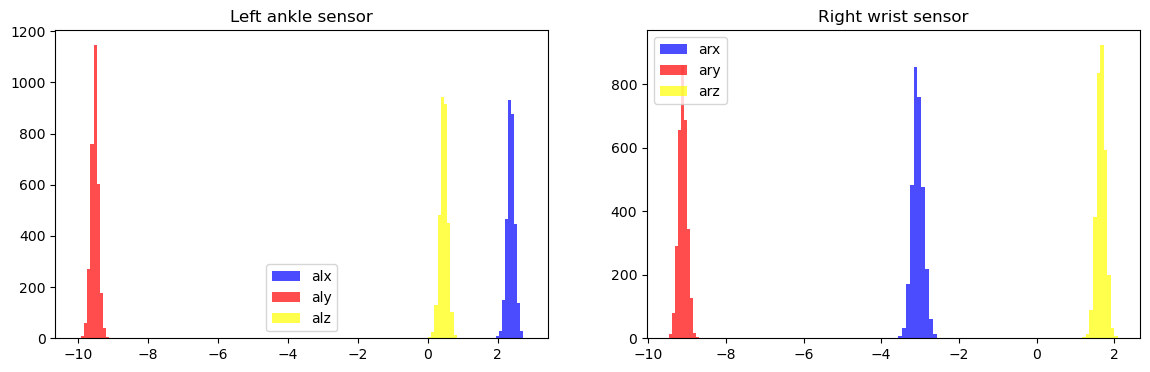

               Standing still (1 min) - g               


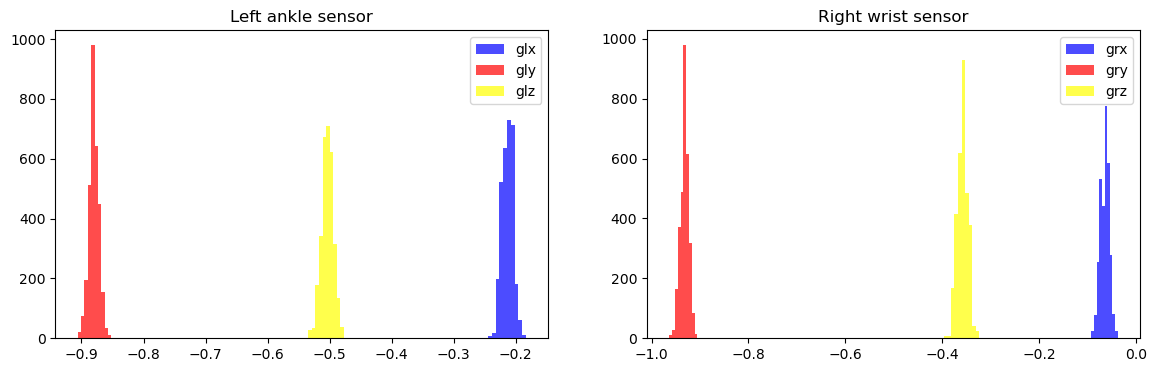

               Sitting and relaxing (1 min) - a               


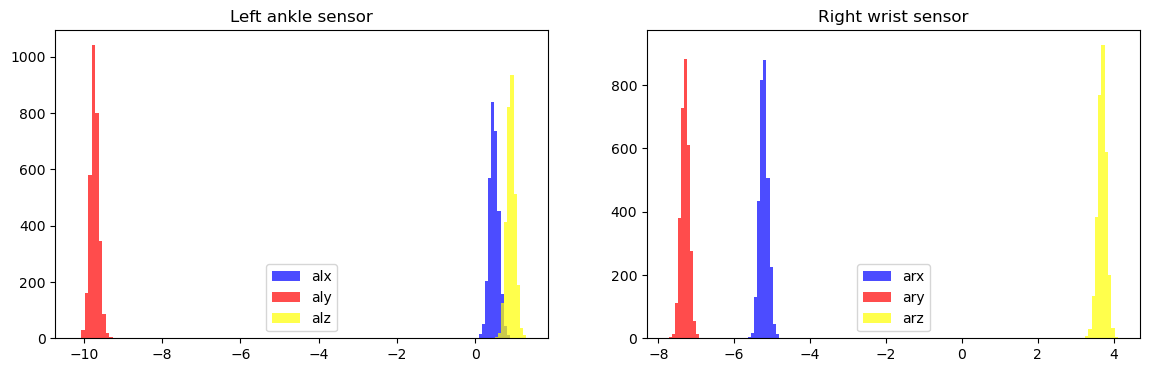

               Sitting and relaxing (1 min) - g               


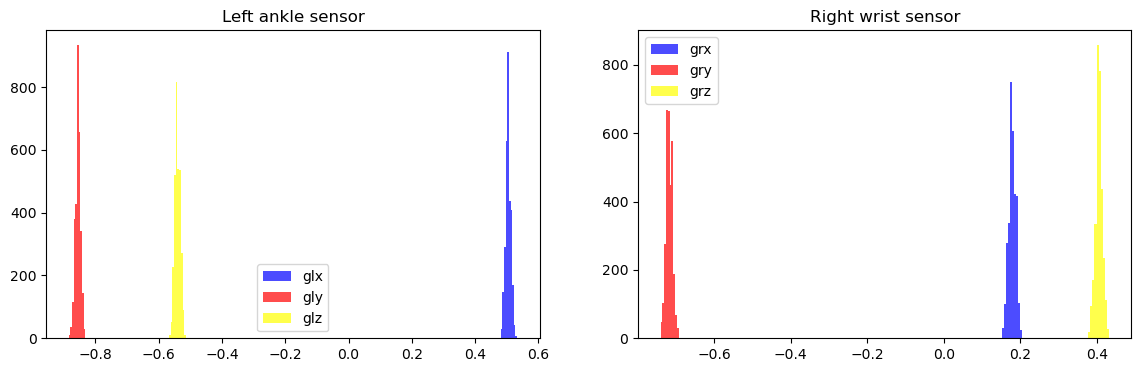

               Lying down (1 min) - a               


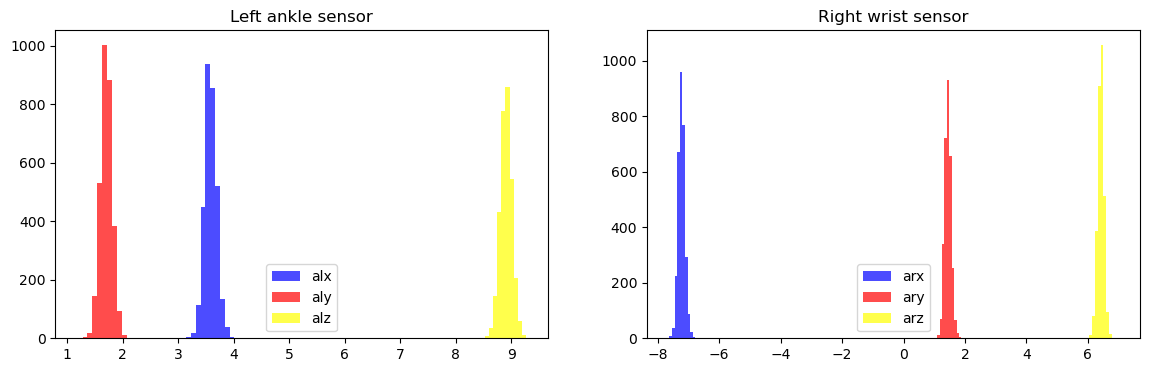

               Lying down (1 min) - g               


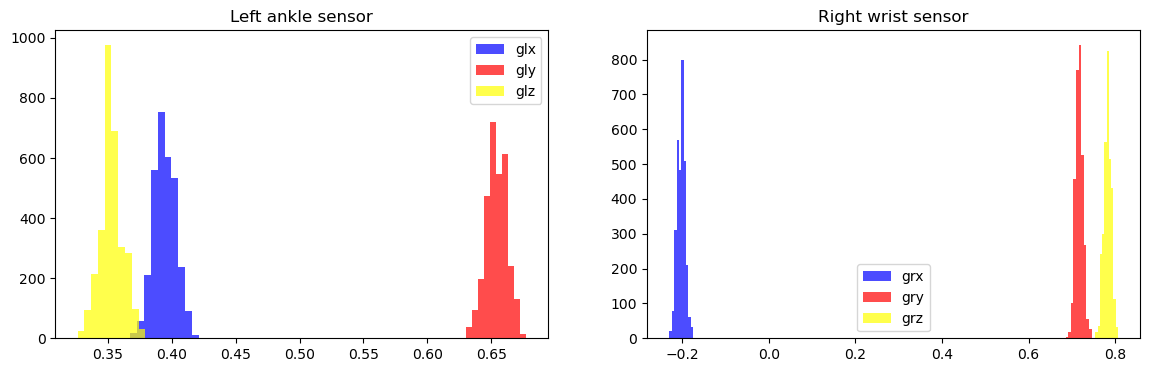

               Walking (1 min) - a               


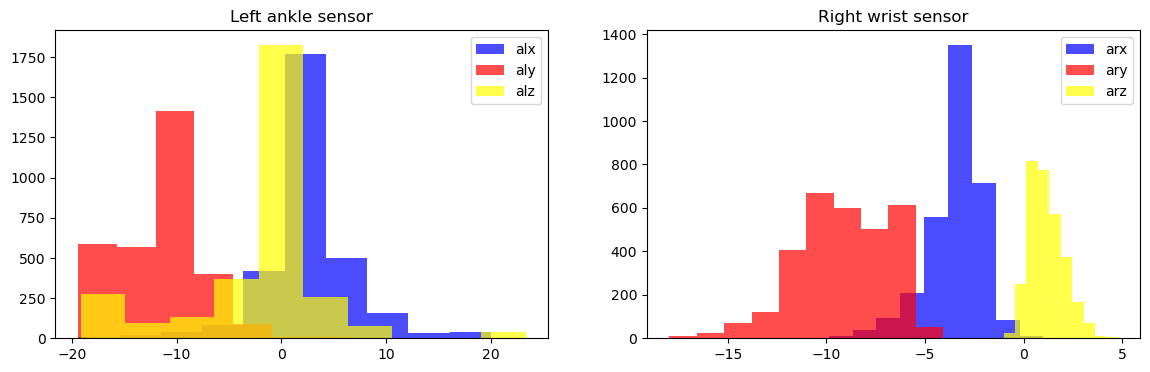

               Walking (1 min) - g               


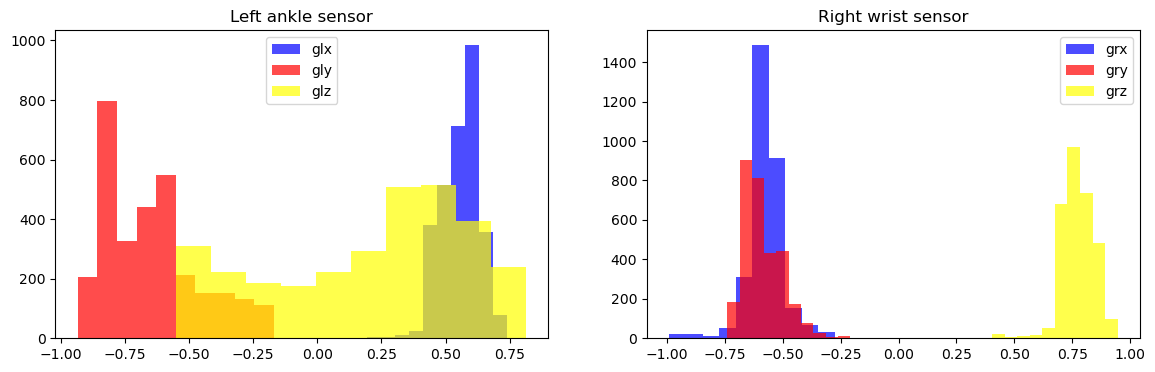

               Climbing stairs (1 min) - a               


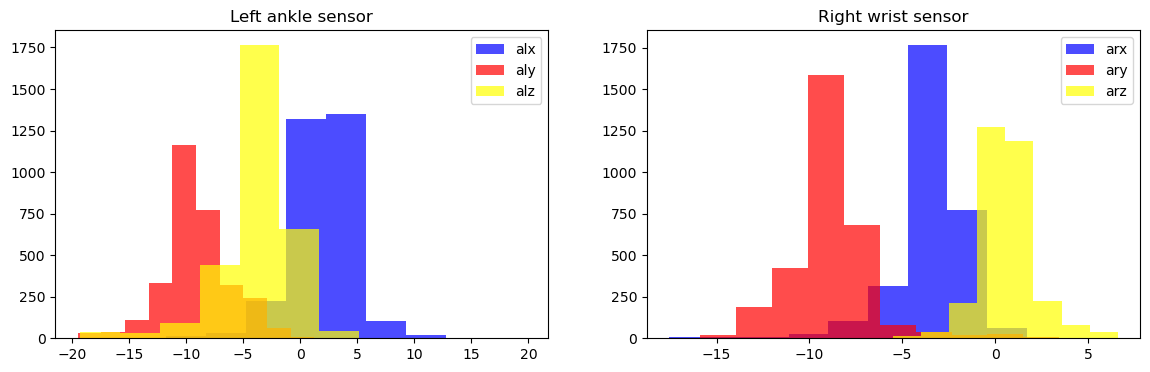

               Climbing stairs (1 min) - g               


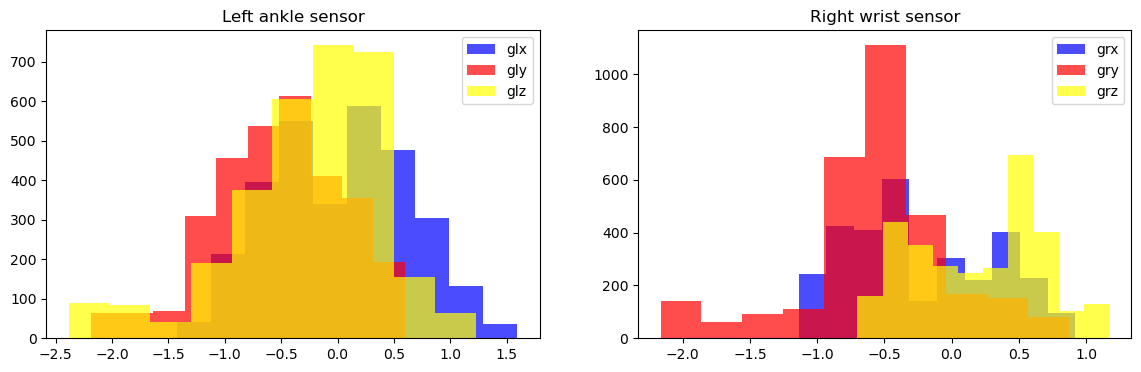

               Waist bends forward (20x) - a               


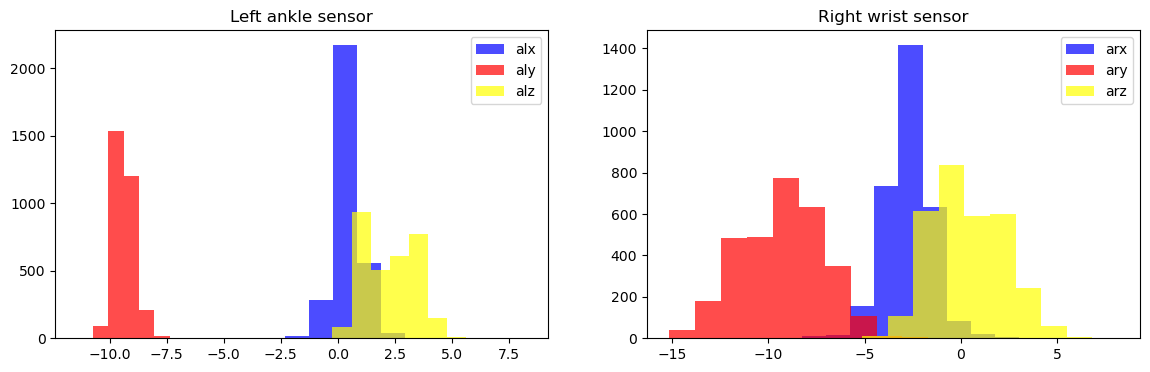

               Waist bends forward (20x) - g               


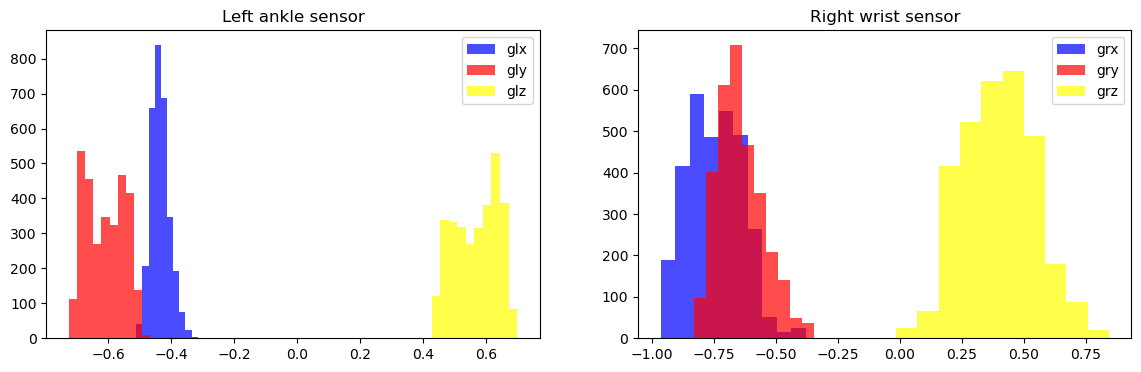

               Frontal elevation of arms (20x) - a               


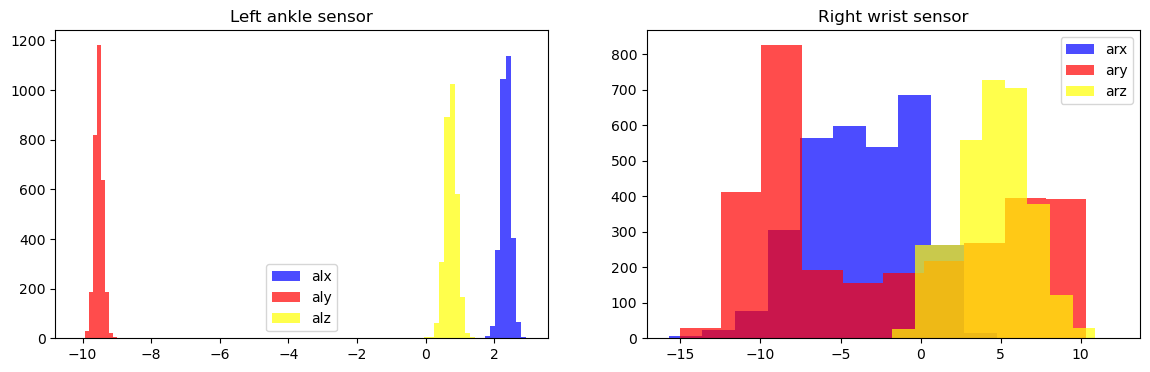

               Frontal elevation of arms (20x) - g               


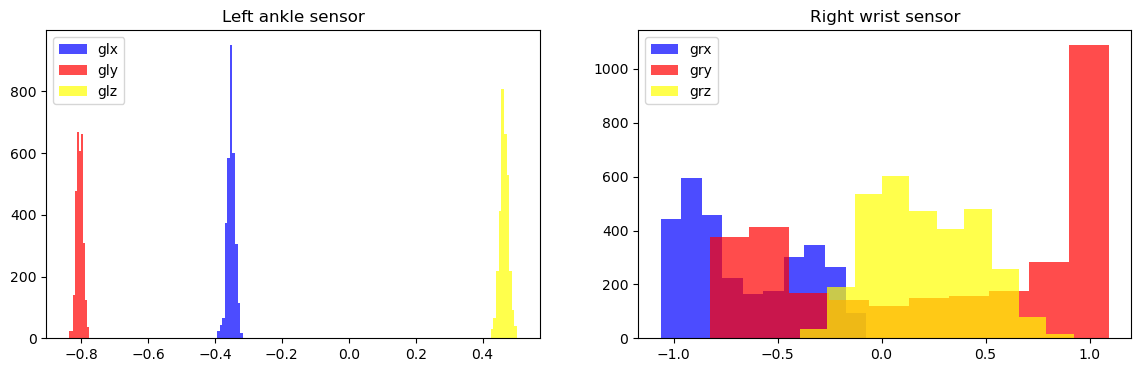

               Knees bending (crouching) (20x) - a               


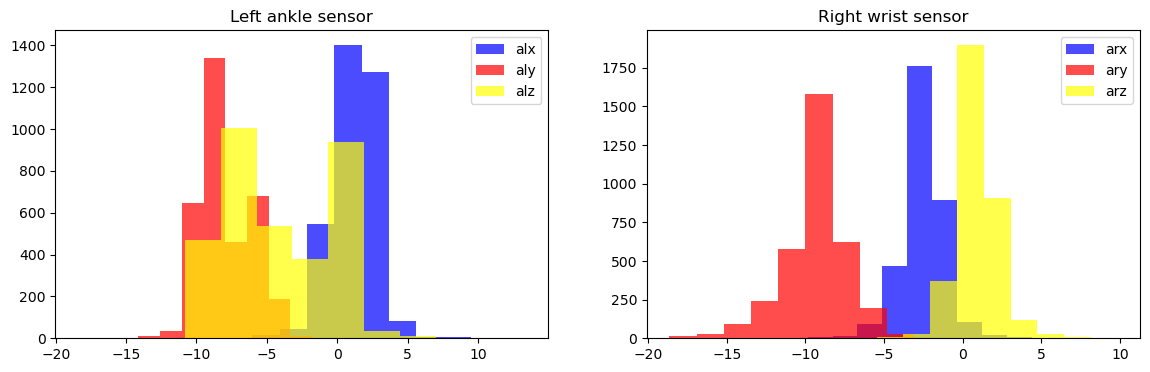

               Knees bending (crouching) (20x) - g               


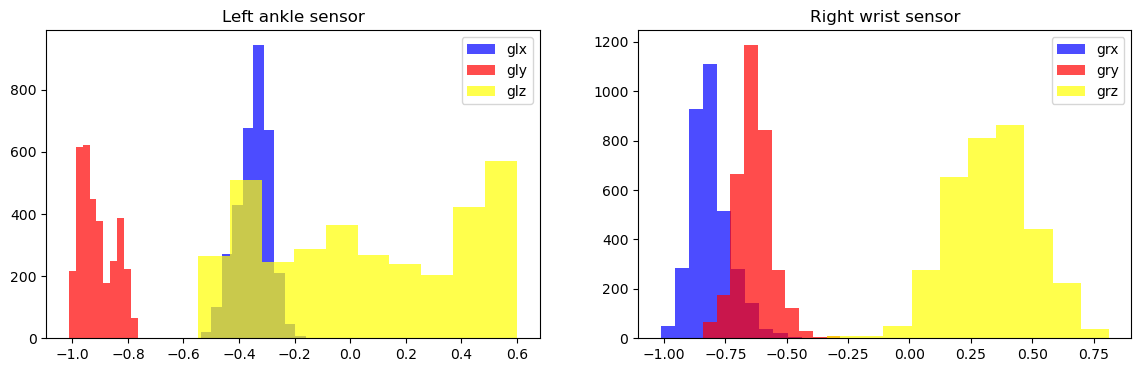

               Cycling (1 min) - a               


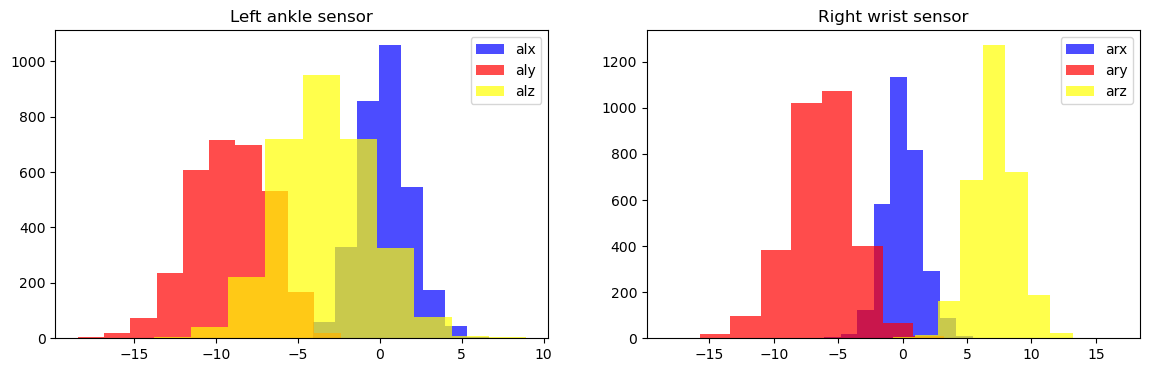

               Cycling (1 min) - g               


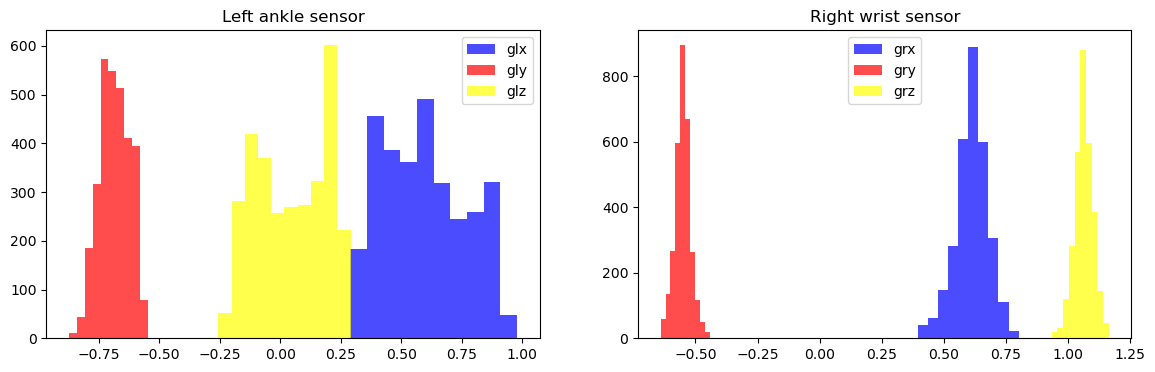

               Jogging (1 min) - a               


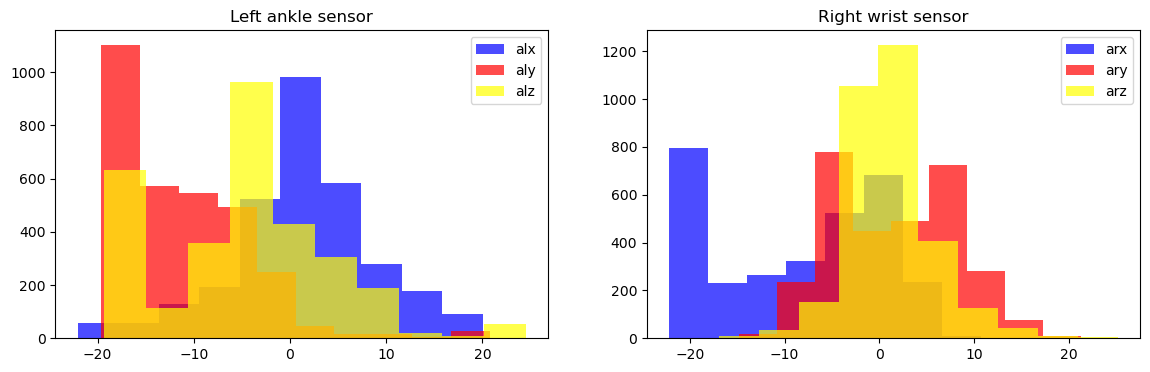

               Jogging (1 min) - g               


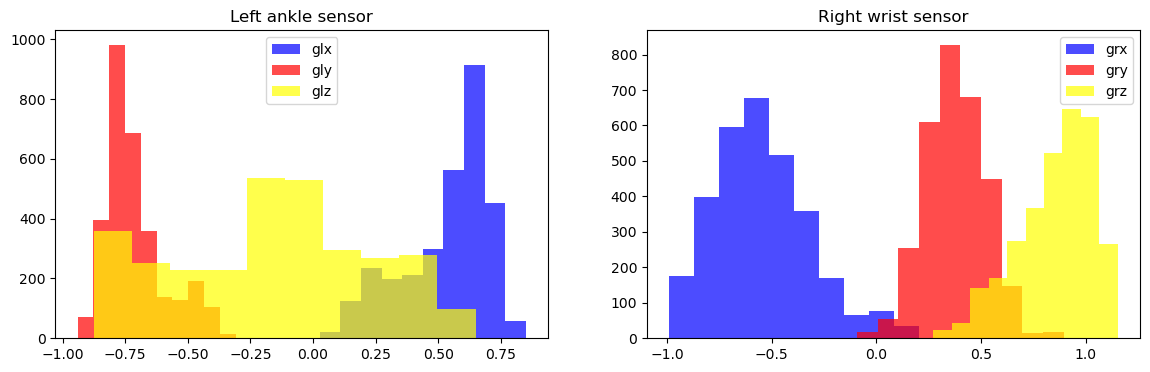

               Running (1 min) - a               


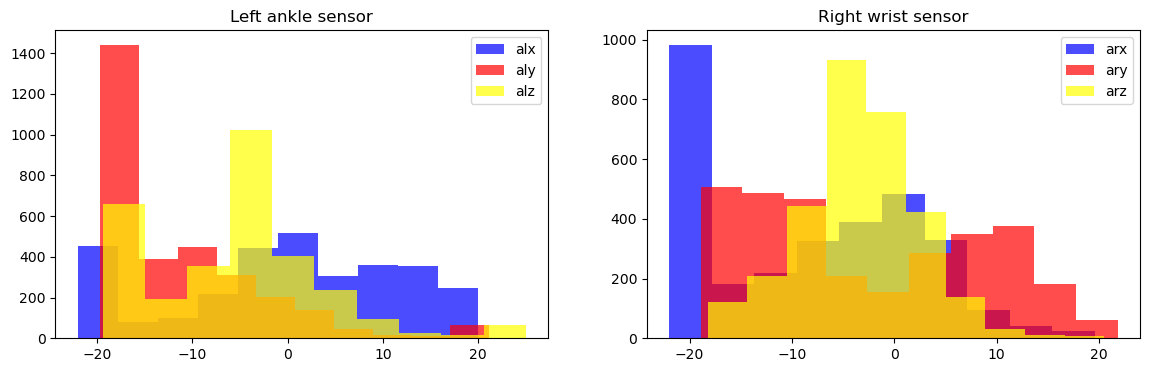

               Running (1 min) - g               


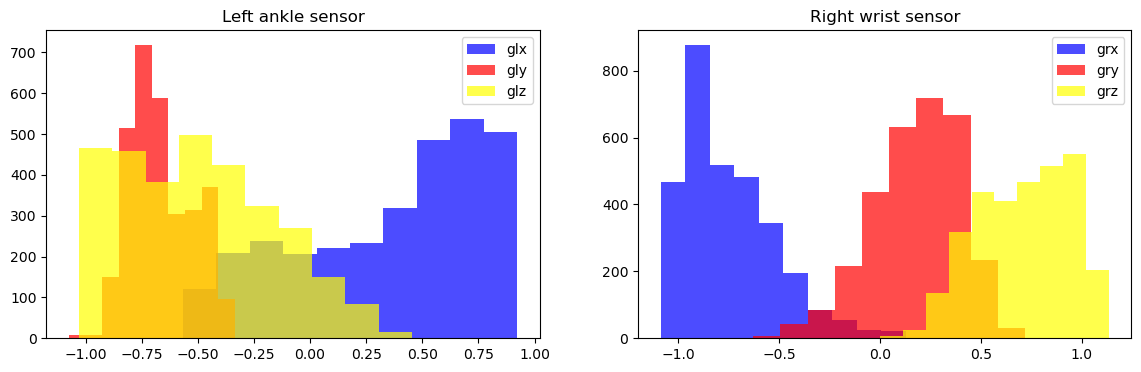

               Jump front & back (20x) - a               


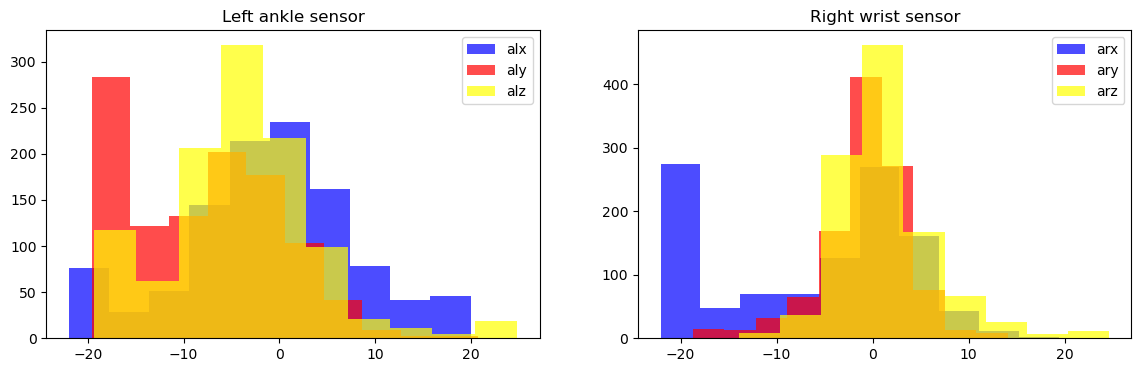

               Jump front & back (20x) - g               


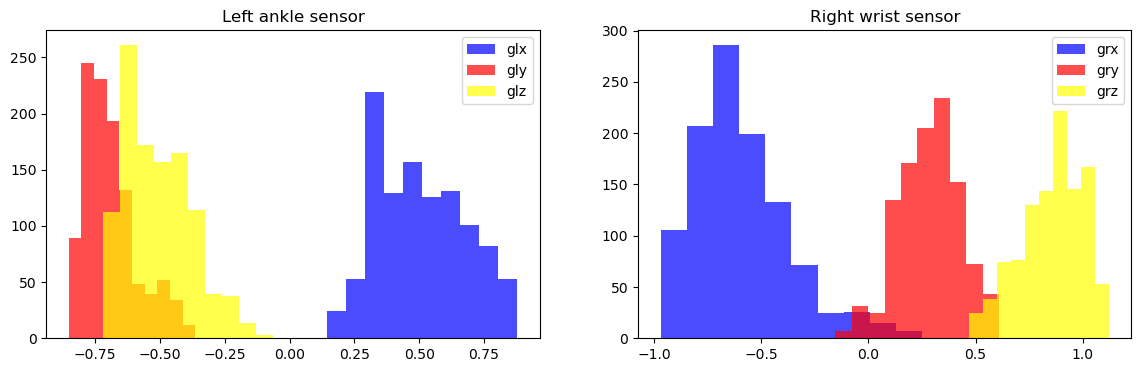

In [14]:
subject1 = df[df["subject"] == "subject1"]
reading = ['a' , 'g']

for i in range(1,13):
    for r in reading:
        print(f"               {activity_label[i]} - {r}               ")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1["Activity"]==i].reset_index(drop = True)[r + "lx"], color = "blue" , alpha = 0.7 , label=r + "lx")
        plt.hist(subject1[subject1["Activity"]==i].reset_index(drop = True)[r + "ly"], color = "red" , alpha = 0.7 , label=r + "ly")
        plt.hist(subject1[subject1["Activity"]==i].reset_index(drop = True)[r + "lz"], color = "yellow" , alpha = 0.7 , label=r + "lz")
        plt.title("Left ankle sensor")
        plt.legend()
        
        plt.subplot(1,2,2)
        plt.hist(subject1[subject1["Activity"]==i].reset_index(drop = True)[r + "rx"], color = "blue" , alpha = 0.7 , label=r + "rx")
        plt.hist(subject1[subject1["Activity"]==i].reset_index(drop = True)[r + "ry"], color = "red" , alpha = 0.7 , label=r + "ry")
        plt.hist(subject1[subject1["Activity"]==i].reset_index(drop = True)[r + "rz"], color = "yellow" , alpha = 0.7 , label=r + "rz")
        plt.title("Right wrist sensor")
        plt.legend()
        plt.show()
        

In [15]:
df['Activity'] = df['Activity'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12],["None", "Standing still (1 min)", "Sitting and relaxing (1 min)", "Lying down (1 min)", "Walking (1 min)", "Climbing stairs (1 min)", "Waist bends forward (20x)", "Frontal elevation of arms (20x)", "Knees bending (crouching) (20x)", "Cycling (1 min)", "Jogging (1 min)",
    "Running (1 min)","Jump front & back (20x)"])


In [16]:
df["Activity"]

847870                        None
1160687                       None
1165507                       None
111816                        None
105484                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 347195, dtype: object

In [17]:
df.Activity.value_counts()

Activity
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Jogging (1 min)                    30720
Running (1 min)                    30720
Climbing stairs (1 min)            30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
None                                4000
Name: count, dtype: int64

<Axes: ylabel='count'>

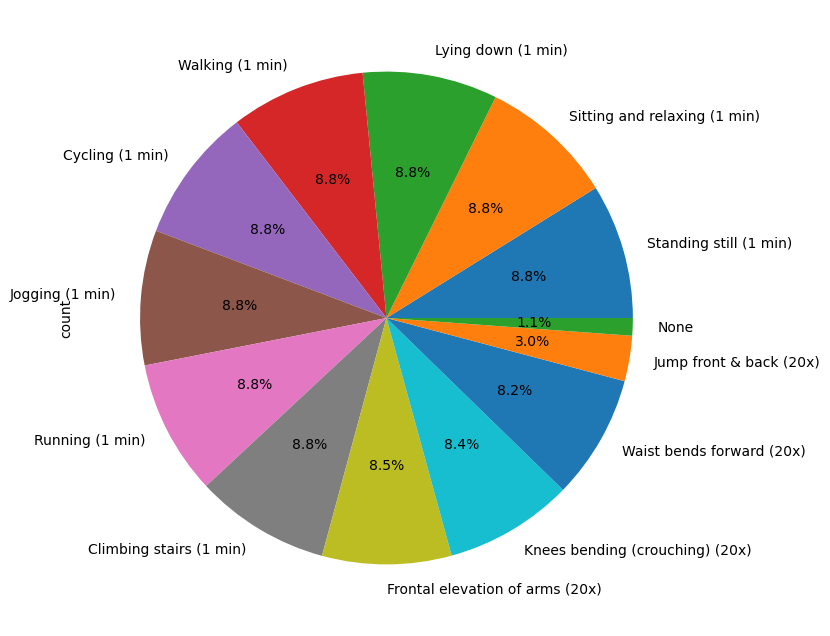

In [18]:
plt.figure(figsize=(12,8))
round(df["Activity"].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%2.1f%%')

In [19]:
df1 = df.copy()
for feature in df1.columns[:-2]:
    lower_range = np.quantile(df[feature],0.01)
    upper_range = np.quantile(df[feature],0.99)
    print(feature, "range:",lower_range, "to", upper_range)
    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis = 0)
    print("shape",df1.shape)

alx range: -11.56042 to 19.297
shape (340252, 14)
aly range: -19.38 to 2.659659999999998
shape (334799, 14)
alz range: -18.965 to 14.378059999999998
shape (331396, 14)
glx range: -0.7291300000000001 to 0.8033399999999999
shape (324985, 14)
gly range: -1.0619 to 0.96998
shape (318839, 14)
glz range: -1.1041 to 0.8290799999999999
shape (313693, 14)
arx range: -21.506 to 9.304935999999998
shape (308955, 14)
ary range: -18.702 to 12.177
shape (303303, 14)
arz range: -10.691 to 11.841119999999995
shape (301026, 14)
grx range: -1.0137 to 0.96471
shape (297831, 14)
gry range: -1.1314 to 0.90144
shape (293290, 14)
grz range: -0.67457 to 1.1228
shape (289216, 14)


In [20]:
df1

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
1160687,7.57900,0.32919,6.18600,0.53989,0.337710,-0.051081,-9.6059,0.43053,0.052776,-0.71569,0.459960,0.446120,None,subject10
1165507,0.29263,-9.70120,0.17411,-0.62152,-0.795500,0.239690,-5.2512,-8.02290,0.713440,-0.62353,-0.710470,-0.523710,None,subject10
111816,10.18000,-19.36500,-16.66900,0.12616,-0.814260,-0.736740,-21.2910,-18.69100,4.930000,-0.65098,-0.583160,0.704740,None,subject1
868035,1.30180,-9.51320,-2.80640,0.31911,-0.347090,0.442040,-8.7758,-3.13760,3.239000,-0.19804,0.032854,0.788790,None,subject8
727447,0.29550,-7.10840,2.03300,0.45455,0.045028,-0.738700,-12.2770,-1.81510,8.492600,0.39608,-0.221770,0.922410,None,subject6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213637,-0.33315,-1.23710,-2.91940,0.63822,-0.427770,-0.748530,-2.2515,-0.41479,0.520930,-0.41765,-1.037000,0.088362,Jump front & back (20x),subject10
1213640,6.77570,-15.07500,7.39740,0.61967,-0.337710,-0.827110,-2.2797,-2.35890,2.111200,-0.41765,-1.037000,0.088362,Jump front & back (20x),subject10
1213641,-2.48730,-19.23300,3.46140,0.61967,-0.337710,-0.827110,-8.2348,-4.96520,2.480900,-0.43725,-1.018500,0.079741,Jump front & back (20x),subject10
1213644,3.01420,-19.33400,-7.70740,0.71058,-0.270170,-0.754420,-21.1380,-18.69800,1.158800,-0.42549,-1.037000,0.084052,Jump front & back (20x),subject10


In [21]:
le = LabelEncoder()
df["subject"] = le.fit_transform(df['subject'])

In [22]:
df["Activity"] = le.fit_transform(df['Activity'])

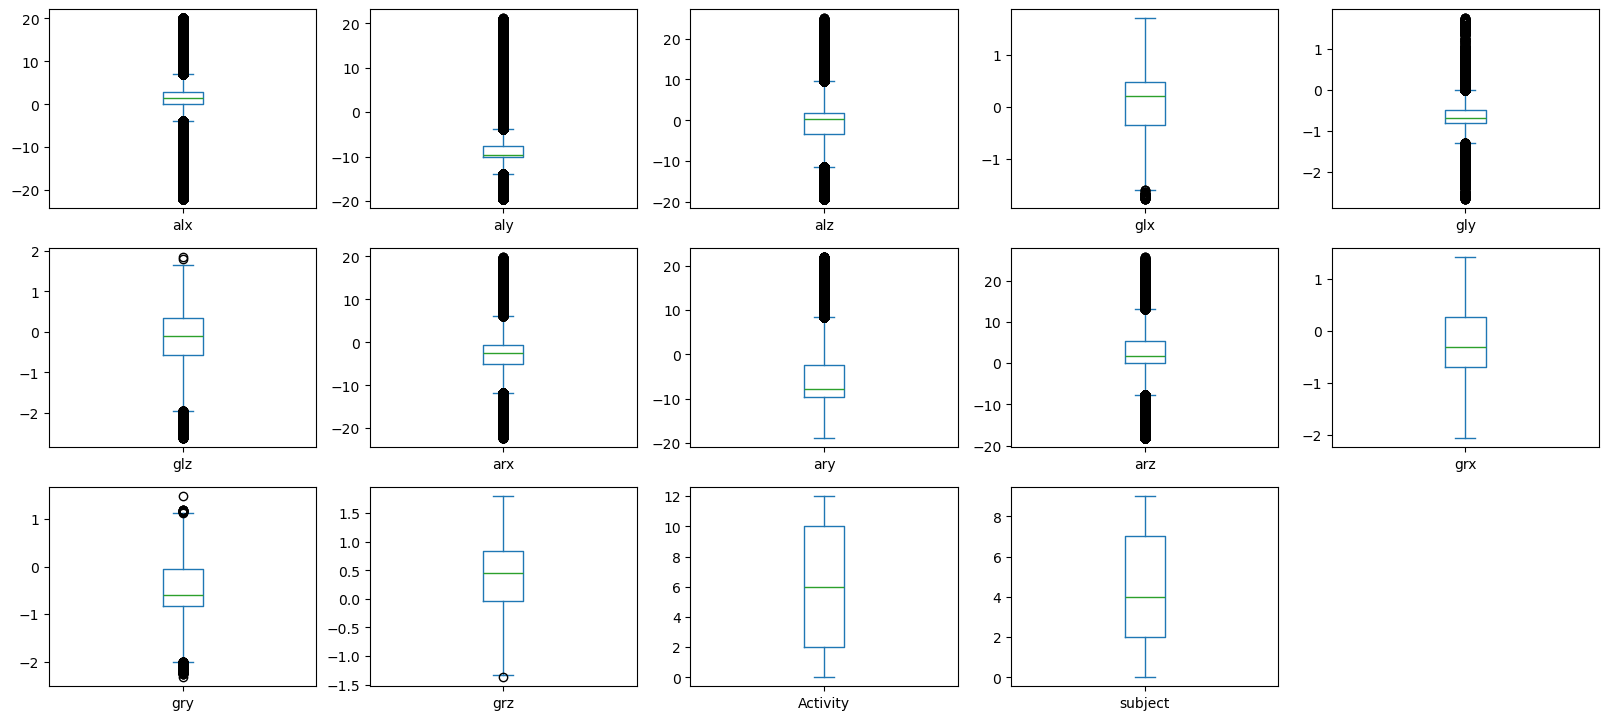

In [23]:
df.plot(kind = 'box', subplots = True, layout = (5,5), figsize=(20,15))
plt.show()

In [24]:
x = df.drop(['Activity','subject'],axis = 1).values
y = df['Activity'].values

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [26]:
ro_scaler= RobustScaler().fit(x_train)
x_train_scaled = ro_scaler.transform(x_train)
x_test_scaled = ro_scaler.transform(x_test)

In [52]:
# Building the model
def resultsSummarizer(y_true,y_pred,cm_en= True):
    cm = confusion_matrix(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred, average = "macro")
    rec = sensitivity = recall_score(y_true,y_pred, average = "macro")
    f1 = f1_score(y_true,y_pred, average = "macro")
    
    if cm_en:
        plt.figure(figsize=(15,15))
        sns.heatmap(cm , annot = True , cmap="Blues", xticklabels=activity_label.values(), yticklabels=activity_label.values())

    print(f'Accuracy score : ' + '{:.4%}'.format(acc))
    print(f'Precision score : ' + '{:.4%}'.format(prec))
    print(f'Recall score : ' + '{:.4%}'.format(rec))
    print(f'F1 score : ' + '{:.4%}'.format(f1))

In [28]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
lr.score(x_train,y_train)

0.6356357240510607

In [30]:
lr2 = LogisticRegression()
lr2.fit(x_train_scaled,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
lr2.score(x_train_scaled,y_train)

0.6449561437195656

In [32]:
lr2.score(x_test_scaled,y_test)

0.6445696378990541

In [33]:
y_pred_lr = lr2.predict(x_test_scaled)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


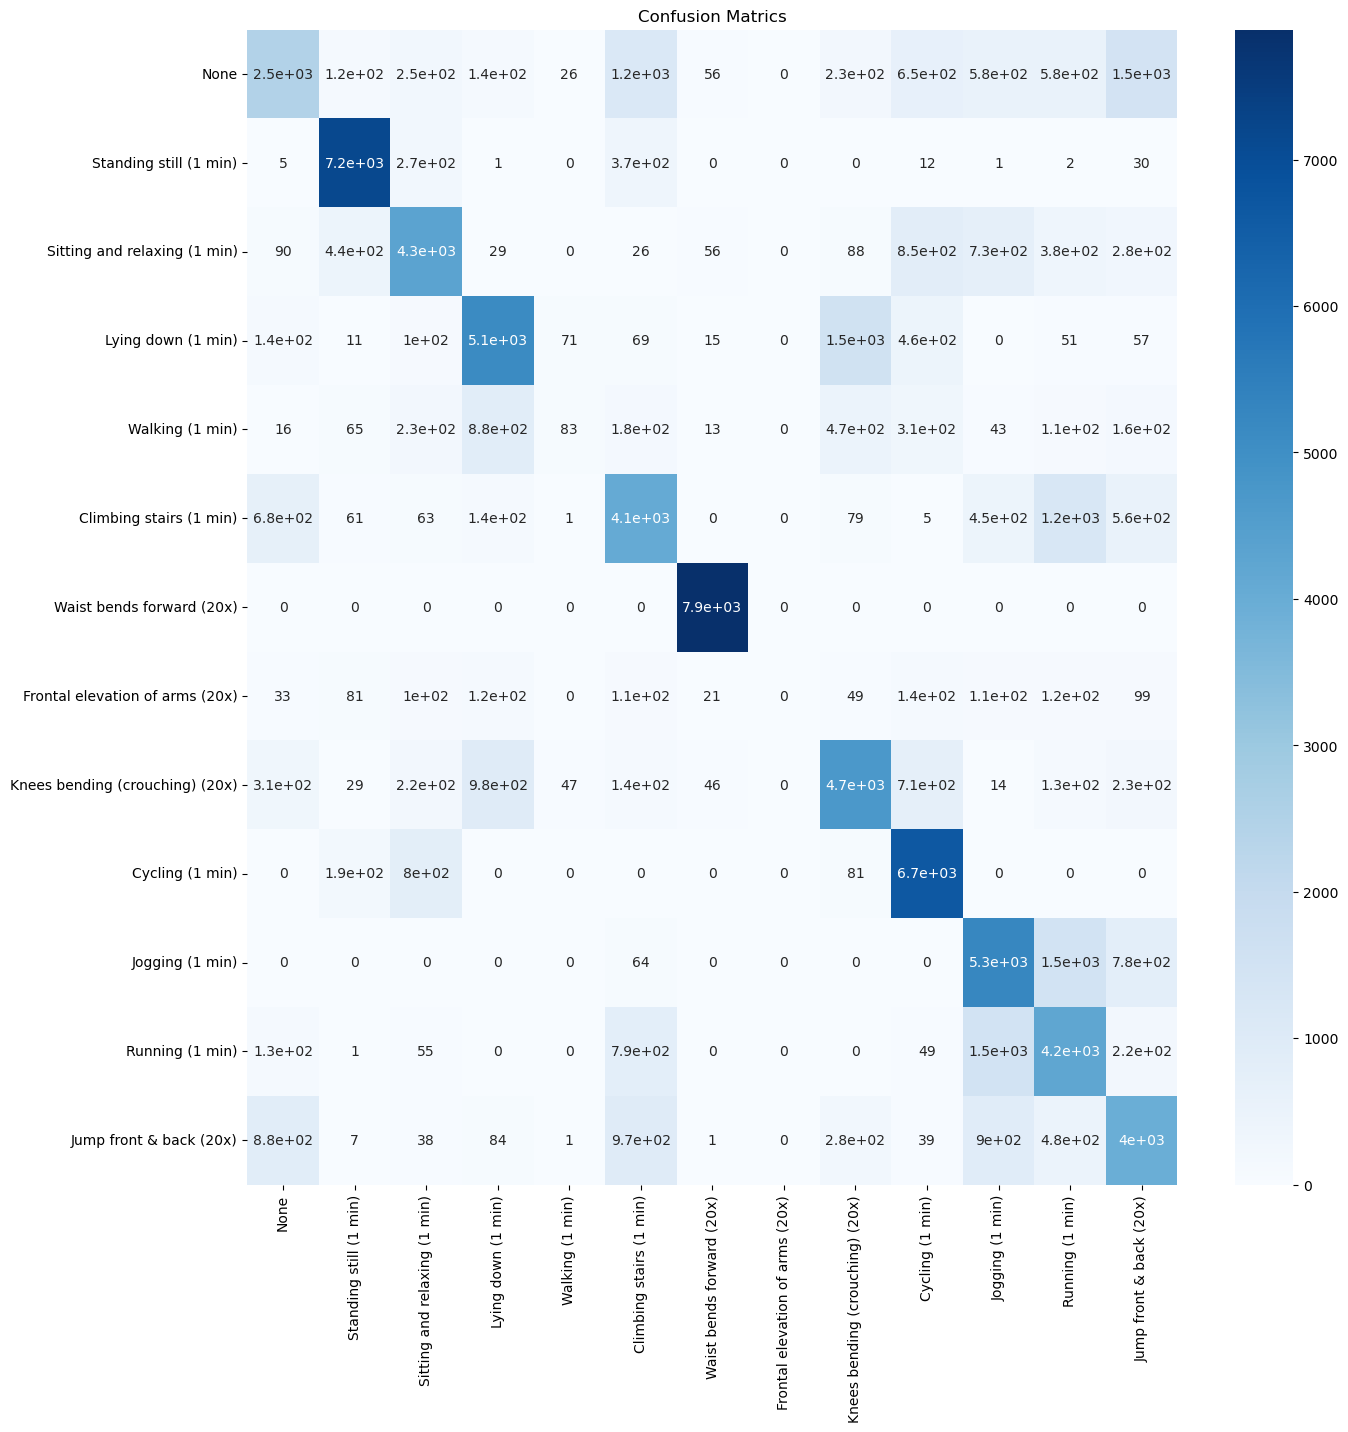

Accuracy score : 64.4570%
Precision score : 57.1733%
Recall score : 56.8064%
F1 score : 55.5081%


In [34]:
resultsSummarizer(y_test, y_pred_lr)

In [36]:
# KNN
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred_knn = knn1.predict(x_test)

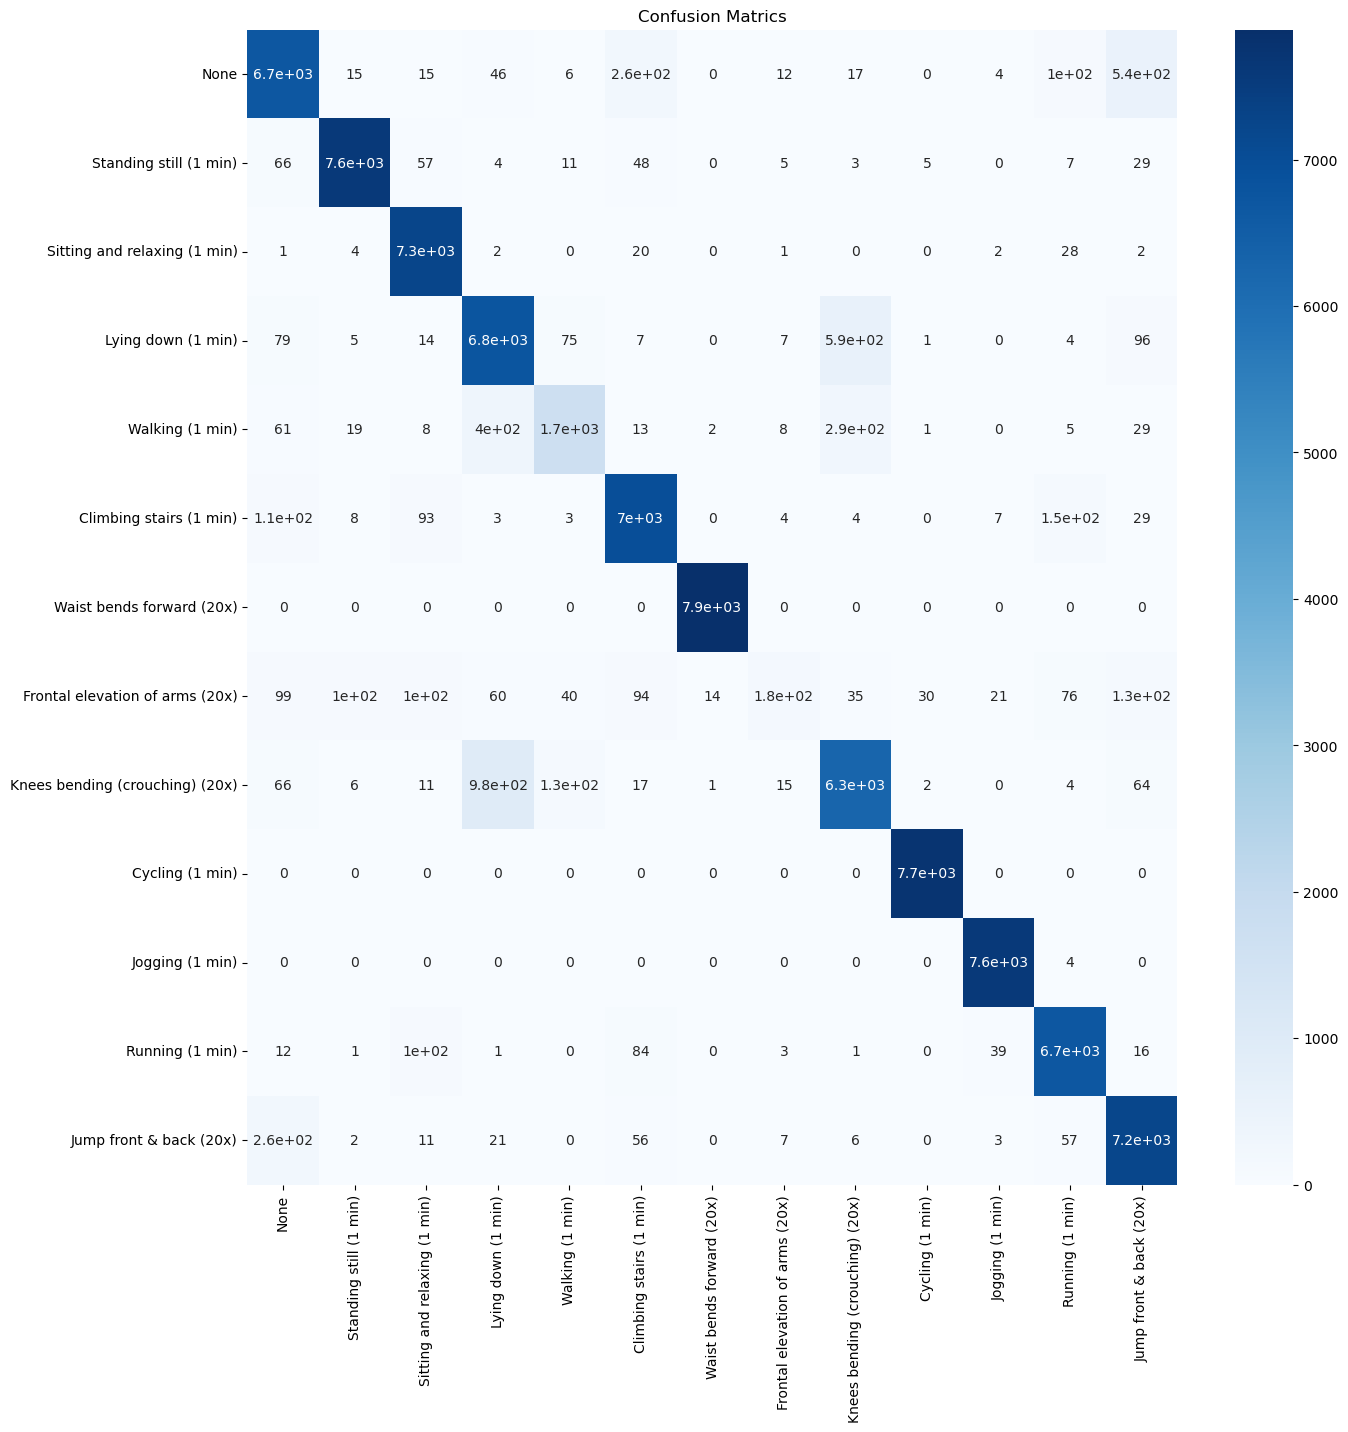

Accuracy score : 92.8294%
Precision score : 91.1630%
Recall score : 86.5566%
F1 score : 87.4339%


In [38]:
resultsSummarizer(y_test,y_pred_knn)

In [43]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train_scaled, y_train)
y_pred_knn2 = knn2.predict(x_test_scaled)

In [53]:
resultsSummarizer(y_test,y_pred_knn2, cm_en = False)

Accuracy score : 96.7868%
Precision score : 96.4146%
Recall score : 91.1899%
F1 score : 92.4164%


In [54]:
for n in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(x_train_scaled,y_train)
    y_pred = knn.predict(x_test_scaled)
    print(f'\n==================== No.of neighbors: {n}==============\n')
    resultsSummarizer(y_test,y_pred, cm_en = False)


==================== No.of neighbors: 1==============

Accuracy score : 97.1958%
Precision score : 95.4788%
Recall score : 92.7327%
F1 score : 93.6851%

==================== No.of neighbors: 2==============

Accuracy score : 96.7776%
Precision score : 95.1558%
Recall score : 91.6687%
F1 score : 92.7371%

==================== No.of neighbors: 3==============

Accuracy score : 96.9919%
Precision score : 96.6937%
Recall score : 91.7746%
F1 score : 93.0468%

==================== No.of neighbors: 4==============

Accuracy score : 96.8283%
Precision score : 96.5714%
Recall score : 91.3650%
F1 score : 92.6405%

==================== No.of neighbors: 5==============

Accuracy score : 96.7868%
Precision score : 96.4146%
Recall score : 91.1899%
F1 score : 92.4164%

==================== No.of neighbors: 6==============

Accuracy score : 96.5887%
Precision score : 96.3454%
Recall score : 90.7346%
F1 score : 91.9547%

==================== No.of neighbors: 7==============

Accuracy score : 96.5633%
